<a href="https://colab.research.google.com/github/mkoc7/generative-ai-projects/blob/main/g_r_nt_retme_ve_diffusion_modelleri_ipynb_adl_not_defterinin_kopyas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Görüntü Üretme ve Diffusion Modelleri

# Görüntü Üretme ve Diffusion Modelleri

Bu notebook, metin-görüntü dönüşümü yapan diffusion modellerini ve görüntü üretme tekniklerini incelemektedir.

## Neler Öğreneceğiz?
- Diffusion modelleri nasıl çalışır?
- Metin-görüntü dönüşümü nasıl yapılır?
- Stable Diffusion modeli nedir?
- Görüntü üretme parametreleri (guidance scale, steps, seed)
- Prompt mühendisliğinin görüntü üretmedeki önemi

## Diffusion Modelleri Nedir?

Diffusion modelleri, bir görüntüyü adım adım gürültüden arındırarak oluşturan generatif modellerdir. Bu süreç, rastgele gürültüden başlayıp, her adımda gürültüyü azaltarak istenilen görüntüyü oluşturur.

### Yaygın Görüntü Üretme Modelleri
- Stable Diffusion
- DALL-E
- Midjourney
- Imagen

## Metin Tabanlı Görüntü Üretme

Metin tabanlı görüntü üretme, kullanıcının yazdığı metne (prompt) göre görüntüler oluşturan bir teknolojidir. Bu teknoloji, metin anlama ve görüntü üretme modellerini birleştirerek çalışır.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Görüntü 1/3 üretiliyor: Gün batımında bir deniz manzarası, gerçekçi fotoğraf, yüksek kalite


  0%|          | 0/15 [00:00<?, ?it/s]

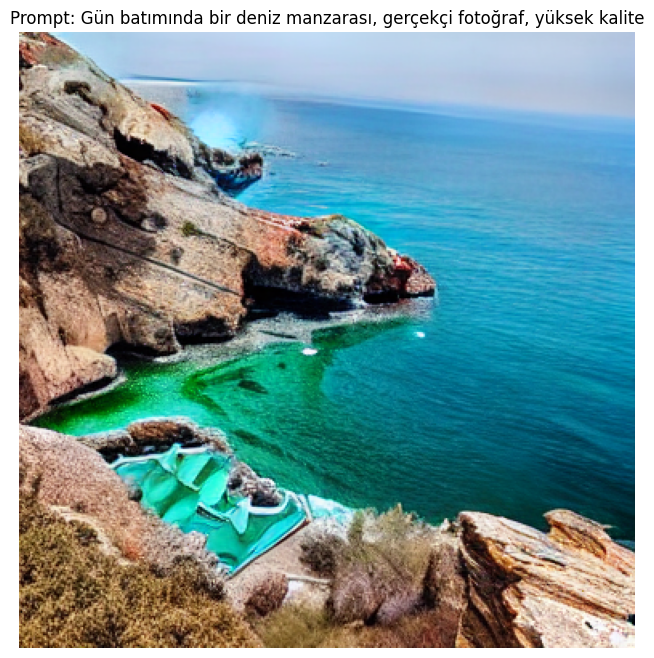

Görüntü 1 başarıyla üretildi!

Görüntü 2/3 üretiliyor: Futuristik bir şehir manzarası, neon ışıklar, dijital sanat


  0%|          | 0/15 [00:00<?, ?it/s]

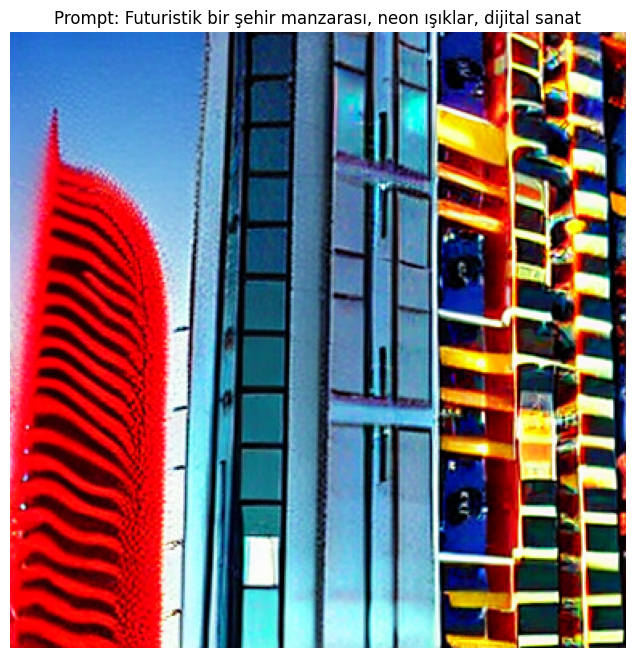

Görüntü 2 başarıyla üretildi!

Görüntü 3/3 üretiliyor: Akıllı robotlar ve insanlar bir arada çalışıyor, konsept sanatı, detaylı


  0%|          | 0/15 [00:00<?, ?it/s]

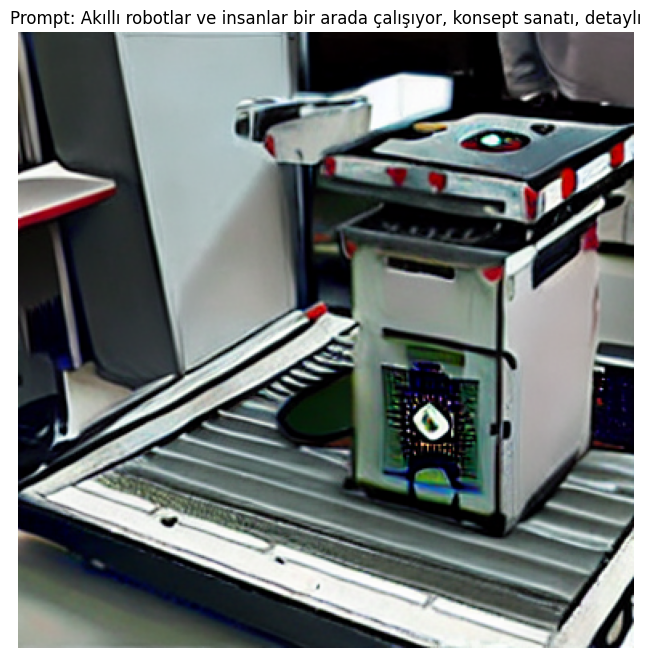

Görüntü 3 başarıyla üretildi!



In [ ]:
# Diffusers kütüphanesini kullanarak Stable Diffusion ile görüntü üretme
!pip install diffusers transformers accelerate

import torch
import gc
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# Model yükleme - optimize edilmiş ayarlar
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    # Düşük bellek modu için
    low_cpu_mem_usage=True
)

if torch.cuda.is_available():
    pipe = pipe.to("cuda")
    # Bellek optimizasyonu için
    pipe.enable_attention_slicing()

# Görüntü üretme fonksiyonu - optimize edilmiş
def generate_image(prompt, negative_prompt="", height=384, width=384, steps=15, guidance_scale=7.0, seed=None):
    """
    Optimize edilmiş görüntü üretme fonksiyonu
    - Daha az adım sayısı
    - Daha düşük çözünürlük
    - Seed kontrolü eklendi
    """
    # Seed ayarlama (tekrarlanabilir sonuçlar için)
    if seed is not None:
        torch.manual_seed(seed)

    # Görüntü üretme
    with torch.autocast("cuda") if torch.cuda.is_available() else torch.no_grad():
        image = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            height=height,
            width=width,
            num_inference_steps=steps,
            guidance_scale=guidance_scale
        ).images[0]

    # Belleği temizleme
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        gc.collect()

    return image

# Görüntü gösterme fonksiyonu
def show_image(image, title=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Test edilecek promptlar
prompts = [
    "Gün batımında bir deniz manzarası, gerçekçi fotoğraf, yüksek kalite",
    "Futuristik bir şehir manzarası, neon ışıklar, dijital sanat",
    "Akıllı robotlar ve insanlar bir arada çalışıyor, konsept sanatı, detaylı"
]

# Her prompt için görüntü üretme
for i, prompt in enumerate(prompts):
    print(f"Görüntü {i+1}/3 üretiliyor: {prompt}")
    try:
        # Her görüntü için farklı seed kullan
        image = generate_image(prompt, seed=i+42)
        show_image(image, f"Prompt: {prompt}")
        print(f"Görüntü {i+1} başarıyla üretildi!\n")
    except Exception as e:
        print(f"Hata: {e}")
        continue